# Hospital Bed Management System
1. Clustering & Regression based on Patient Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, silhouette_score
import pickle
import warnings
warnings.filterwarnings("ignore")

 2. Load and Preview Data


In [2]:
df = pd.read_csv("hospital_data.csv")
df = df.drop(columns=["patient_id", "admission_date", "discharge_date"])
df.head()

,age,gender,acuity_score,diagnosis,department,needs_icu,needs_isolation,needs_ventilator,length_of_stay_days,wait_time_hours,bed_utilization_rate,optimal_allocation_score,allocation_optimal,is_admitted
0,72,M,2.6,Respiratory,Pulmonology,0,0,0,6,5.3,0.897651,3.7,0,1
1,62,F,3.2,Respiratory,Pulmonology,0,0,0,6,1.8,0.733386,2.9,0,1
2,74,M,1.7,Cardiovascular,Cardiology,0,0,0,3,8.3,0.777644,3.6,0,1
3,87,F,2.0,Neurological,Neurology,0,0,0,6,3.4,0.853932,4.2,1,1
4,61,M,4.2,Respiratory,Pulmonology,1,0,0,7,10.1,0.872738,4.1,1,1


3. Data Preprocessing

In [3]:
df['gender'] = df['gender'].map({'M': 0, 'F': 1})
df = pd.get_dummies(df, columns=["diagnosis", "department"], drop_first=True)

4. Clustering Patients

In [4]:
features = ['age', 'gender', 'acuity_score', 'needs_icu', 'needs_isolation', 'needs_ventilator']
X_cluster = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)
silhouette = silhouette_score(X_scaled, df['cluster'])
print(f"Silhouette Score: {silhouette:.2f}")

Silhouette Score: 0.30


5. Visualize Clusters


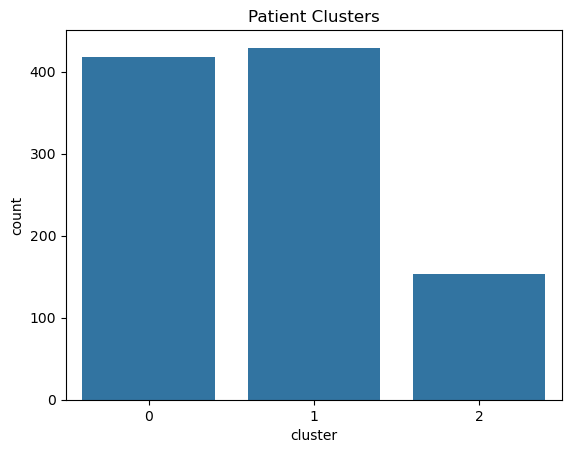

In [5]:
sns.countplot(x='cluster', data=df)
plt.title("Patient Clusters")
plt.show()

6. Regression Model to Predict Length of Stay

In [6]:
X = df.drop(columns=["length_of_stay_days"])
y = df["length_of_stay_days"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

7. Model Evaluation

In [7]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

MAE: 1.50, RMSE: 1.89


8. Visualize Predictions

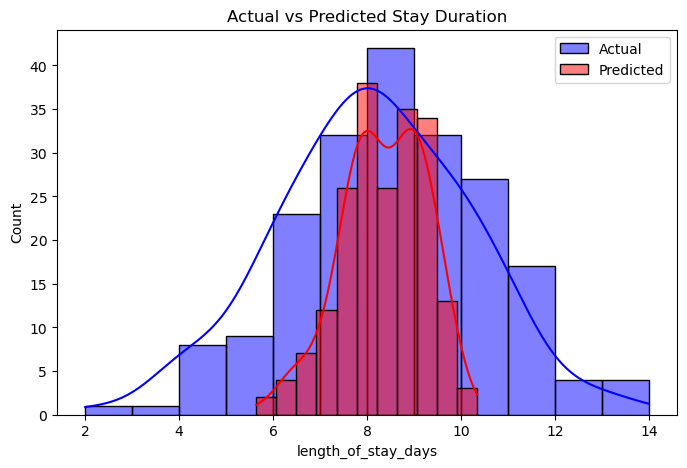

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(y_test, color='blue', kde=True, label='Actual')
sns.histplot(y_pred, color='red', kde=True, label='Predicted')
plt.title("Actual vs Predicted Stay Duration")
plt.legend()
plt.show()

9. Saving Trained Model

In [9]:
with open("stay_duration_model.pkl", "wb") as f:
    pickle.dump(lr, f)

In [10]:
with open("stay_duration_model.pkl", "wb") as f:
    pickle.dump(lr, f)